# Load packages and data

In [1]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset


In [2]:
# Load data
ds_raw = load_dataset("parquet", data_files="part-0.parquet")["train"]

# Filter for year 2006
ds_pre_subprime = ds_raw.filter(lambda x: x["year"] in [2006])

# Add transcript_id as sequential index
ds_pre_subprime = ds_pre_subprime.add_column("transcript_id", list(range(len(ds_pre_subprime))))

# EDA on .csv

## Pre subprime crisis

In [3]:
# Load your extracted triples (from Ollama output)
df_pre = pd.read_csv("extracted_risks_2006.csv")

print("✅ Loaded dataset with shape:", df_pre.shape)
df_pre.head()

✅ Loaded dataset with shape: (1820, 5)


,transcript_id,company,speaker_role,risk_type,expectations
0,0.0,"Agilent Technologies, Inc.",Vice President and Treasurer,forward-looking statements,neutral
1,0.0,"Agilent Technologies, Inc.","President, CEO",forward-looking statements,neutral
2,0.0,"Agilent Technologies, Inc.","Executive Vice President, Finance and Administ...",forward-looking statements,neutral
3,1.0,Agilent Technologies,CEO,market demand,neutral
4,1.0,Agilent Technologies,CEO,competition,neutral


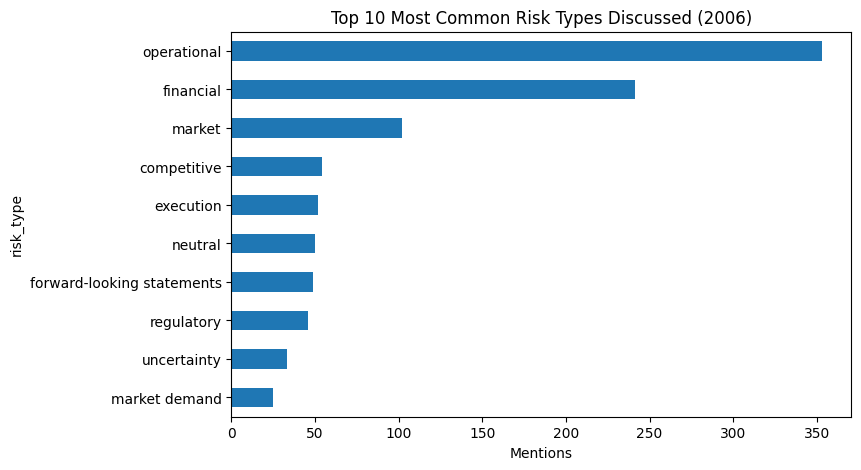

In [4]:
# Top 10 risk types
df_pre['risk_type'].value_counts().head(10).plot(kind='barh', figsize=(8,5))
plt.gca().invert_yaxis()
plt.title("Top 10 Most Common Risk Types Discussed (2006)")
plt.xlabel("Mentions")
plt.show()

In [5]:
df_pre["expectations"].value_counts().sort_index().reset_index().rename(
    columns={"index": "expectation", "expectations": "count"}
)

,count,count
0,ahead of expectations,2
1,below initial expectation,1
2,changed,1
3,fell short of our original sales expectations,1
4,"high single-digit comps, an increase in the gr...",1
5,lower,2
6,negative,3
7,neutral,1809


## Post subprime crisis

In [6]:
# Load your extracted triples (from Ollama output)
df_post = pd.read_csv("extracted_risks_2008.csv")

print("✅ Loaded dataset with shape:", df_pre.shape)
df_post.head()

✅ Loaded dataset with shape: (1820, 5)


,transcript_id,company,speaker_role,risk_type,expectations
0,0.0,Amphenol Corporation,CFO,economic downturn,neutral
1,0.0,Amphenol Corporation,CEO,economic downturn,neutral
2,0.0,Amphenol Corporation,President & COO,economic downturn,neutral
3,0.0,Amphenol Corporation,CFO,economic downturn,neutral
4,0.0,Amphenol Corporation,CFO,slowdown in spending,neutral


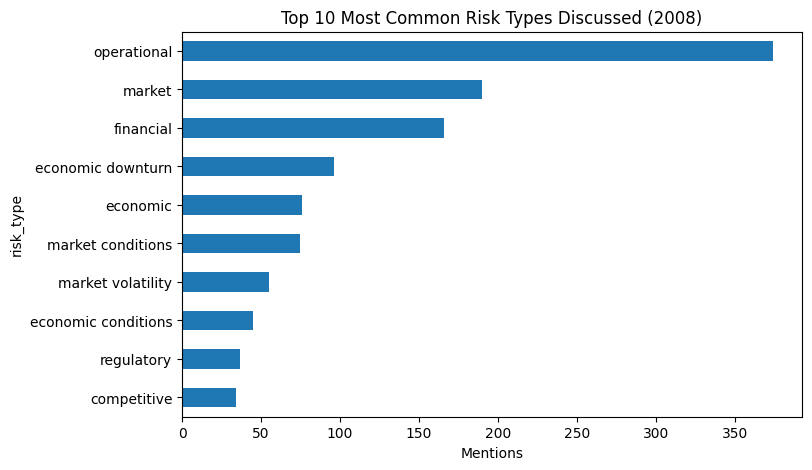

In [7]:
# Top 10 risk types
df_post['risk_type'].value_counts().head(10).plot(kind='barh', figsize=(8,5))
plt.gca().invert_yaxis()
plt.title("Top 10 Most Common Risk Types Discussed (2008)")
plt.xlabel("Mentions")
plt.show()

In [8]:
df_post["expectations"].value_counts().sort_index().reset_index().rename(
    columns={"index": "expectation", "expectations": "count"}
)

,count,count
0,at or around the high end of our previously an...,1
1,decrease,8
2,disappointed,4
3,down,1
4,negative,16
5,neutral,2336


# Manuel inspection
This is only performed on a very small sample from the pre subprime dataset. If time had allowed the inspection should be more comprehensive and included the post subprime dataset

In [9]:
sample = df_pre.sample(5, random_state=42)
sample

,transcript_id,company,speaker_role,risk_type,expectations
1510,305.0,Entergy Corporation,Wayne Leonard,financial,neutral
990,195.0,NVIDIA,CEO,competitive,neutral
135,29.0,"Applied Materials, Inc.","Senior Vice President, General Counsel & Corpo...",neutral,neutral
408,85.0,NaN,CEO,operational,neutral
591,118.0,General Motors,CFO,financial,neutral


In [10]:
# If you only use one dataset:
transcript_lookup = {t["transcript_id"]: t for t in ds_pre_subprime}

In [11]:
def show_transcript(transcript_id, preview_chars=5000):
    if transcript_id not in transcript_lookup:
        print(f"Transcript {transcript_id} not found.")
        return
    
    t = transcript_lookup[transcript_id]
    
    print("=== Transcript Info ===")
    print(f"ID: {t['transcript_id']}")
    print(f"Company: {t.get('company_name')}")
    print(f"Date: {t.get('date', 'N/A')}")
    
    print("\n=== Transcript Text (Preview) ===")
    print(t["content"][:preview_chars])

In [12]:
show_transcript(305)

=== Transcript Info ===
ID: 305
Company: None
Date: 2007-01-30 11:00:00

=== Transcript Text (Preview) ===
TRANSCRIPT SPONSOR :
Executives: Michele Lopiccolo - VP, IR   Wayne Leonard - Chairman & CEO   Leo Denault - CFO & EVP   Gary Taylor - CEO, Entergy Nuclear   Rick Smith - Group President, Utility Operations   Mark Savoff - EVP, Operations 
Analysts: Dan Eggers - Credit Suisse   Greg Gordon - Citigroup   Andrew Levy - Brencourt   Ashar Khan - SAC Capital   Jonathan Arnold - Merrill Lynch   Michael Lapides - Goldman Sachs 
Operator: Good day, everyone, and welcome to the Entergy Corporation fourth quarter 2006 earnings conference call. Today's call is being recorded.  At this time for introductions and opening comments, I would like to turn the call over to Ms. Michele Lopiccolo. Please go ahead. 
Michele Lopiccolo: Thank you for joining us. We'll begin this morning with comments from our Chairman and CEO, Wayne Leonard, and then Leo Denault, our CFO, will review results. After the 

In [13]:
show_transcript(195)

=== Transcript Info ===
ID: 195
Company: None
Date: 2006-02-18 09:30:00

=== Transcript Text (Preview) ===
Executives: Michael Hara, Vice President of Investor Relations   Jen-Hsun Huang, President and Chief Executive Officer   Marvin Burkett, Chief Financial Officer
Analysts: Mark Edelstone, Morgan Stanley   Simona Jankowski, Goldman Sachs   Michael McConnell, Pacific Crest Securities   Sidney Ho, Merrill Lynch   Satya Chillara, American Technology Research   Dan Morris, CIBC World Markets   Krishna Shankar, JMP Securities   Hans Mosesmann, Moors & Cabot   Shawn Webster, JP Morgan   Brian Alger, Pacific Growth Equities   Devan Moodley, Scotia Capital   Robert Dennison, UBS   Arnab Chanda, Lehman Brothers   Naser Iqbal, Salman Partners
Operator: Good afternoon and thank you for holding, I would now like to turn the call over to Mr. Michael Hara, NVIDIA's Vice President of Investor Relations. Thank you. Sir, you may begin your conference.
Michael Hara, VP of Investor Relations: Thanks B

In [14]:
show_transcript(29)

=== Transcript Info ===
ID: 29
Company: Applied Materials, Inc.
Date: 2006-02-17 10:15:00

=== Transcript Text (Preview) ===
Executives: Paul Bowman, Managing Director of Investor Relations   Nancy Handel, Senior Vice President and Chief Financial Officer   Michael Splinter, Chief Executive Officer and President   Joe Sweeney Senior Vice President, General Counsel & Corporate Secretary.
Analysts: Jay Deahna, J.P. Morgan   Satya Kumar, Credit Suisse   Edward White, Lehman Brothers   Timothy Arcuri, Citigroup   Jim Covello, Goldman Sachs   Patrick Ho, Stifel Nicolaus   Mike O'Brien, Bear Stearns   Robert Maire, Needham   Garyshueh, CIBC World Market   Timothy N. Schulze Melander, Morgan Stanley   Raj Seth, SG Cowen   Stephen Chin, UBS   Brett Hodess, Merrill Lynch   Steven Pelayo, Soleil Securities   Steve O'Rourke, Deutsche Bank   William Lu, Piper Jaffray   Shekhar Pramanick, Moors & Cab   Stuart Muter, RBC Capital Markets
Operator: Good afternoon and thank you for standing by. Welcome

In [15]:
show_transcript(85)

=== Transcript Info ===
ID: 85
Company: None
Date: 2006-04-27 17:00:00

=== Transcript Text (Preview) ===
Carl Jasper: Thank you, Operator and again welcome to our Fiscal 3rd Quarter 2006 Earnings Conference Call.  With me on the call today are Jack Gifford, our Chairman, President and Chief Executive Officer, and our two group Presidents, Tunc Delugha, and Peruz Pavarande, and also on the call is Alan Hill, Vice President of Dallas Semiconductor. There are some administrative items that I would like to take care of before we cover our results.  First we will be forward-looking statements on this call.  In light of the private securities litigation reformat, I would like to remind you that statements we make about the future, including our intentions or expectations or predictions of the future, including but not limited to possible statements regarding bookings and turn orders, revenues and earnings, inventory and spending levels, manufacturing efficiencies and capacity, projected in 

In [16]:
show_transcript(118)

=== Transcript Info ===
ID: 118
Company: None
Date: 2006-10-25 09:30:00

=== Transcript Text (Preview) ===
Executives: Randy Arickx - IR  Fritz Henderson - Vice Chair, CFO  Sanjiv Khattri - EVP, CFO of GMAC  Paul Ballew - Executive Director, -Global Markets Mark Newman – CFO Walter Borst - Treasurer 
Analysts: Scott Merlis - Thomas Weisel Partners  John Murphy - Merrill Lynch  Joseph Amaturo - Calyon Securities  Rod Lache - Deutsche Bank  Himanshu Patel – JP Morgan  Jon Rogers - Citigroup  Jonathan Steinmetz - Morgan Stanley  Chris Ceraso - Credit Suisse  Ronald Tadross - Banc of America Securities 
Media: Jim Mateja - Chicago Tribune  Chris Isidore - CNN/Money  Bill Vlasic - Detroit News  Tom Krisher - Associated Press  David Welch - Business Week 
Operator: Welcome to the General Motors third quarter 2006 earnings conference call. (Operator Instructions) I would now like to turn the conference over to Mr. Randy Arickx, Executive Director of GM Investor Relations and Financial Communi